In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
cleaned_file = 'otodomScrapRAWData_cleaned.csv'
df = pd.read_csv(cleaned_file)
print(df.shape)
df.head(6)

(17010, 12)


,price,latitude,longitude,surface_area,num_of_room,floor,num_floors_in_building,finish_condition,form_of_property,balcony_garden_terrace,parking_space,heating
0,1109400.0,52.196401,20.952040,73.06,4,1.0,7.0,for finishing,full ownership,Balcony,garage/parking space,NaN
1,NaN,52.112868,20.973348,47.87,2,0.0,3.0,for finishing,full ownership,"Terrace, Garden",NaN,NaN
2,1255000.0,52.233130,21.019000,42.00,3,4.0,6.0,for living,full ownership,Balcony,NaN,municipal
3,980000.0,52.272250,20.928295,60.00,2,0.0,7.0,for living,full ownership,Garden,garage/parking space,municipal
4,880000.0,52.238722,20.961506,49.90,2,7.0,7.0,for living,NaN,NaN,NaN,municipal
5,NaN,52.164608,20.799947,130.46,4,2.0,4.0,for finishing,full ownership,Balcony,garage/parking space,NaN


The `balcony_garden_terrace` column has multiple values so an regular `OneHotEncoder` will not work here.

Therefore, we will use a specialized `MultiLabelBinarizer` for this purpose </p>

In [3]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 0: Becuase we have some NaN values, it will throw AttributeError: 'float' object has no attribute 'split'
df['balcony_garden_terrace'] = df['balcony_garden_terrace'].fillna("Placeholder")

# Step 1: Split the strings into lists
df['balcony_garden_terrace'] = df['balcony_garden_terrace'].apply(lambda x: x.split(', '))

# Step 2: Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(df['balcony_garden_terrace'])

# Create a DataFrame with the one-hot encoded columns
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_, index=df.index)

# Step 3: Combine the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded_df], axis=1)

# Drop the original 'balcony_garden_terrace' column
df = df.drop(["balcony_garden_terrace", "Placeholder"], axis=1)

# Display the resulting DataFrame
df.head(6)

,price,latitude,longitude,surface_area,num_of_room,floor,num_floors_in_building,finish_condition,form_of_property,parking_space,heating,Balcony,Garden,Terrace
0,1109400.0,52.196401,20.952040,73.06,4,1.0,7.0,for finishing,full ownership,garage/parking space,NaN,1,0,0
1,NaN,52.112868,20.973348,47.87,2,0.0,3.0,for finishing,full ownership,NaN,NaN,0,1,1
2,1255000.0,52.233130,21.019000,42.00,3,4.0,6.0,for living,full ownership,NaN,municipal,1,0,0
3,980000.0,52.272250,20.928295,60.00,2,0.0,7.0,for living,full ownership,garage/parking space,municipal,0,1,0
4,880000.0,52.238722,20.961506,49.90,2,7.0,7.0,for living,NaN,NaN,municipal,0,0,0
5,NaN,52.164608,20.799947,130.46,4,2.0,4.0,for finishing,full ownership,garage/parking space,NaN,1,0,0


In [4]:
print(df['Balcony'].dtype)

int32


In [5]:
df['parking_space'] = df['parking_space'].apply(lambda x: 1 if x == 'garage/parking space' else 0).astype('int8')

In [6]:
df = pd.concat([df, pd.get_dummies(df['form_of_property'])], axis=1)
df = df.drop(['form_of_property'], axis=1)

In [7]:
df.head(5)

,price,latitude,longitude,surface_area,num_of_room,floor,num_floors_in_building,finish_condition,parking_space,heating,Balcony,Garden,Terrace,cooperative ownership right to the premises,full ownership,perpetual usufruct / lease 29,share
0,1109400.0,52.196401,20.952040,73.06,4,1.0,7.0,for finishing,1,NaN,1,0,0,False,True,False,False
1,NaN,52.112868,20.973348,47.87,2,0.0,3.0,for finishing,0,NaN,0,1,1,False,True,False,False
2,1255000.0,52.233130,21.019000,42.00,3,4.0,6.0,for living,0,municipal,1,0,0,False,True,False,False
3,980000.0,52.272250,20.928295,60.00,2,0.0,7.0,for living,1,municipal,0,1,0,False,True,False,False
4,880000.0,52.238722,20.961506,49.90,2,7.0,7.0,for living,0,municipal,0,0,0,False,False,False,False


In [8]:
df = pd.concat([df, pd.get_dummies(df['heating'])], axis = 1)
df = df.drop(['heating'], axis=1)

In [9]:
df.head(6)

,price,latitude,longitude,surface_area,num_of_room,floor,num_floors_in_building,finish_condition,parking_space,Balcony,...,cooperative ownership right to the premises,full ownership,perpetual usufruct / lease 29,share,boiler room,electric,gas,municipal,other,piece kaflowe
0,1109400.0,52.196401,20.952040,73.06,4,1.0,7.0,for finishing,1,1,...,False,True,False,False,False,False,False,False,False,False
1,NaN,52.112868,20.973348,47.87,2,0.0,3.0,for finishing,0,0,...,False,True,False,False,False,False,False,False,False,False
2,1255000.0,52.233130,21.019000,42.00,3,4.0,6.0,for living,0,1,...,False,True,False,False,False,False,False,True,False,False
3,980000.0,52.272250,20.928295,60.00,2,0.0,7.0,for living,1,0,...,False,True,False,False,False,False,False,True,False,False
4,880000.0,52.238722,20.961506,49.90,2,7.0,7.0,for living,0,0,...,False,False,False,False,False,False,False,True,False,False
5,NaN,52.164608,20.799947,130.46,4,2.0,4.0,for finishing,1,1,...,False,True,False,False,False,False,False,False,False,False


In [10]:
# df['finish_condition'] = df['finish_condition'].apply(lambda x:
#                                                       1 if x == 'for living'
#                                                       else 0.8 if x == 'for renovation'
#                                                       else 0.5 if pd.isnull(x)
#                                                       else 0 if x == 'for finishing'
#                                                       else 0.5)
# 'for living'
# 'for finishing'
# 'for renovation'
#  NaN

In [11]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into two parts based on whether 'price' is missing
# df_without_price = df[df['price'].isna()]
df_without_price = df[pd.isnull(df['price'])]

df = df[df['price'].notna()]

print(df_without_price.shape)
print(df.shape)

(2205, 22)
(14805, 22)


In [12]:
df.sample(5)

,price,latitude,longitude,surface_area,num_of_room,floor,num_floors_in_building,finish_condition,parking_space,Balcony,...,cooperative ownership right to the premises,full ownership,perpetual usufruct / lease 29,share,boiler room,electric,gas,municipal,other,piece kaflowe
14976,2860000.0,52.276161,20.968152,129.00,5,0.0,2.0,for finishing,1,0,...,False,True,False,False,False,False,False,True,False,False
11802,590000.0,52.178498,21.053121,42.30,2,8.0,NaN,NaN,0,0,...,False,False,False,False,False,False,False,False,False,False
10861,598000.0,52.236580,20.908380,36.50,2,9.0,9.0,for living,1,1,...,False,False,False,False,False,False,False,False,False,False
1874,2100000.0,52.258940,20.971540,60.00,3,6.0,6.0,NaN,0,0,...,False,False,False,False,False,False,False,False,False,False
12440,1069000.0,52.158880,21.078880,53.63,2,3.0,4.0,for living,0,1,...,False,True,False,False,False,False,False,True,False,False


In [13]:
df.columns

Index(['price', 'latitude', 'longitude', 'surface_area', 'num_of_room',
       'floor', 'num_floors_in_building', 'finish_condition', 'parking_space',
       'Balcony', 'Garden', 'Terrace',
       'cooperative ownership right to the premises', 'full ownership',
       'perpetual usufruct / lease 29', 'share', 'boiler room', 'electric',
       'gas', 'municipal', 'other', 'piece kaflowe'],
      dtype='object')


## Hypothesis Testing

In [14]:
price_living = df[df['finish_condition'] == 'for living']['price']
price_finishing = df[df['finish_condition'] == 'for finishing']['price']
print(price_living.shape)
print(price_finishing.shape)
print(price_living.dtype)
print(price_finishing.dtype)

(7455,)
(3860,)
float64
float64


In [15]:
import scipy as sp
SIGNIFICANCE_LEVEL = 0.05

t_stat, p_value = sp.stats.ttest_ind(price_living, price_finishing)
print(t_stat, p_value)

rejecting = p_value < SIGNIFICANCE_LEVEL
print("NULL Hypth. H0: A will-be-ready-to-live house is cheaper than a ready-to-live house.")
print(("" if rejecting else "Not ") + "possible to reject the null hypothesis")

15.651347842069383 1.2150577546499431e-54
NULL Hypth. H0: A will-be-ready-to-live house is cheaper than a ready-to-live house.
possible to reject the null hypothesis


### Prepare data for Machine Learning Algorithms

In [16]:
df.sample(5)

,price,latitude,longitude,surface_area,num_of_room,floor,num_floors_in_building,finish_condition,parking_space,Balcony,...,cooperative ownership right to the premises,full ownership,perpetual usufruct / lease 29,share,boiler room,electric,gas,municipal,other,piece kaflowe
13458,975000.0,52.253783,20.986873,59.80,3,3.0,13.0,for renovation,0,1,...,False,True,False,False,False,False,False,True,False,False
9296,1127000.0,52.285210,20.927850,64.17,3,1.0,8.0,for finishing,1,1,...,False,True,False,False,False,False,False,False,False,False
14627,749000.0,52.295350,21.039400,47.76,3,4.0,10.0,for living,0,1,...,False,True,False,False,False,False,False,False,False,False
12400,1099000.0,52.227580,20.888310,52.50,3,2.0,6.0,for living,1,1,...,False,True,False,False,False,False,False,True,False,False
15861,1325000.0,52.185519,20.995157,57.36,3,2.0,8.0,for living,1,1,...,False,True,False,False,False,False,False,True,False,False


In [17]:
df.isnull().sum()

price                                             0
latitude                                          0
longitude                                         0
surface_area                                      0
num_of_room                                       0
floor                                           344
num_floors_in_building                          779
finish_condition                               2389
parking_space                                     0
Balcony                                           0
Garden                                            0
Terrace                                           0
cooperative ownership right to the premises       0
full ownership                                    0
perpetual usufruct / lease 29                     0
share                                             0
boiler room                                       0
electric                                          0
gas                                               0
municipal   

In [18]:
print(df.shape)
df = df.dropna(subset=['floor', 'num_floors_in_building'])
print(df.shape)

(14805, 22)
(14021, 22)


In [19]:
X = df.drop(['price', 'finish_condition'], axis=1)
y = df['price']
X.isnull().sum()

latitude                                       0
longitude                                      0
surface_area                                   0
num_of_room                                    0
floor                                          0
num_floors_in_building                         0
parking_space                                  0
Balcony                                        0
Garden                                         0
Terrace                                        0
cooperative ownership right to the premises    0
full ownership                                 0
perpetual usufruct / lease 29                  0
share                                          0
boiler room                                    0
electric                                       0
gas                                            0
municipal                                      0
other                                          0
piece kaflowe                                  0
dtype: int64

# Machine Learning

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

## 01: Decision Tree Regressor

In [22]:

tree = DecisionTreeRegressor(random_state=24)
tree.fit(X_train, y_train)
tree_score = tree.score(X_test, y_test)
tree_predict = tree.predict(X_test)
tree_mae = mean_absolute_error(y_test, tree_predict)
tree_mse = mean_squared_error(y_test, tree_predict)
tree_r2 = r2_score(y_test, tree_predict)

print("Decision Tree Score: ", tree_score)
print(f"Mean Absolute Error: {tree_mae}")
print(f"Mean Squared Error: {tree_mse}")
print(f"R-squared: {tree_r2}")

Decision Tree Score:  0.7744141914609483
Mean Absolute Error: 118902.92917409388
Mean Squared Error: 52457092442.15492
R-squared: 0.7744141914609483


## 02: Random Forest Regressor

In [23]:
forest = RandomForestRegressor(random_state=24)
forest.fit(X_train, y_train)
forest_score = forest.score(X_test, y_test)
forest_predict = forest.predict(X_test)
forest_mae = mean_absolute_error(y_test, forest_predict)
forest_mse = mean_squared_error(y_test, forest_predict)
forest_r2 = r2_score(y_test, forest_predict)

print("RandomForestRegressor Score: ", forest_score)
print(f"Mean Absolute Error: {forest_mae}")
print(f"Mean Squared Error: {forest_mse}")
print(f"R-squared: {forest_r2}")

RandomForestRegressor Score:  0.893947679410712
Mean Absolute Error: 92080.33564375936
Mean Squared Error: 24661109760.78654
R-squared: 0.893947679410712


## 03: Support Vector Regression

In [24]:
svr = SVR()
svr.fit(X_train, y_train)
svr_score = svr.score(X_test, y_test)
svr_predict = svr.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_predict)
svr_mse = mean_squared_error(y_test, svr_predict)
svr_r2 = r2_score(y_test, svr_predict)

print("Support Vector Regression Score: ", svr_score)
print(f"Mean Absolute Error: {svr_mae}")
print(f"Mean Squared Error: {svr_mse}")
print(f"R-squared: {svr_r2}")

Support Vector Regression Score:  -0.07935572757607323
Mean Absolute Error: 330464.20706369786
Mean Squared Error: 250990359482.7679
R-squared: -0.07935572757607323


## 04: Support Vector Regression (Scaled)

In [25]:
# Scale the features (X)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target (y)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Train the SVR model on the scaled data
svr_scaled = SVR()
svr_scaled.fit(X_train_scaled, y_train_scaled)

svr_scaled_score = svr_scaled.score(X_train_scaled, y_train_scaled)

# Make predictions
svr_scaled_predict_scaled = svr_scaled.predict(X_test_scaled)

# Inverse transform the scaled predictions
# svr_predict = scaler_y.inverse_transform(svr_scaled_predict_scaled)
# Reshape to 2D array and inverse transform
svr_scaled_predict = scaler_y.inverse_transform(np.reshape(svr_scaled_predict_scaled, (-1, 1)))

# Calculate metrics
svr_scaled_mae = mean_absolute_error(y_test, svr_scaled_predict)
svr_scaled_mse = mean_squared_error(y_test, svr_scaled_predict)
svr_scaled_r2 = r2_score(y_test, svr_scaled_predict)

# Print metrics
print("SCALED Support Vector Regression Score: {svr_scaled_score}")
print(f"Mean Absolute Error: {svr_scaled_mae}")
print(f"Mean Squared Error: {svr_scaled_mse}")
print(f"R-squared: {svr_scaled_r2}")

SCALED Support Vector Regression Score: {svr_scaled_score}
Mean Absolute Error: 143929.23247457726
Mean Squared Error: 52703008268.81967
R-squared: 0.773356658189315


## 05: Linear Regression

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
lr_predict = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_predict)
lr_mse = mean_squared_error(y_test, lr_predict)
lr_r2 = r2_score(y_test, lr_predict)

print("Linear Regression Score: ", lr_score)
print(f"Mean Absolute Error: {lr_mae}")
print(f"Mean Squared Error: {lr_mse}")
print(f"R-squared: {lr_r2}")

Linear Regression Score:  0.544368830461851
Mean Absolute Error: 223701.22586947415
Mean Squared Error: 105951196729.87878
R-squared: 0.544368830461851


### Compare different Algorithms

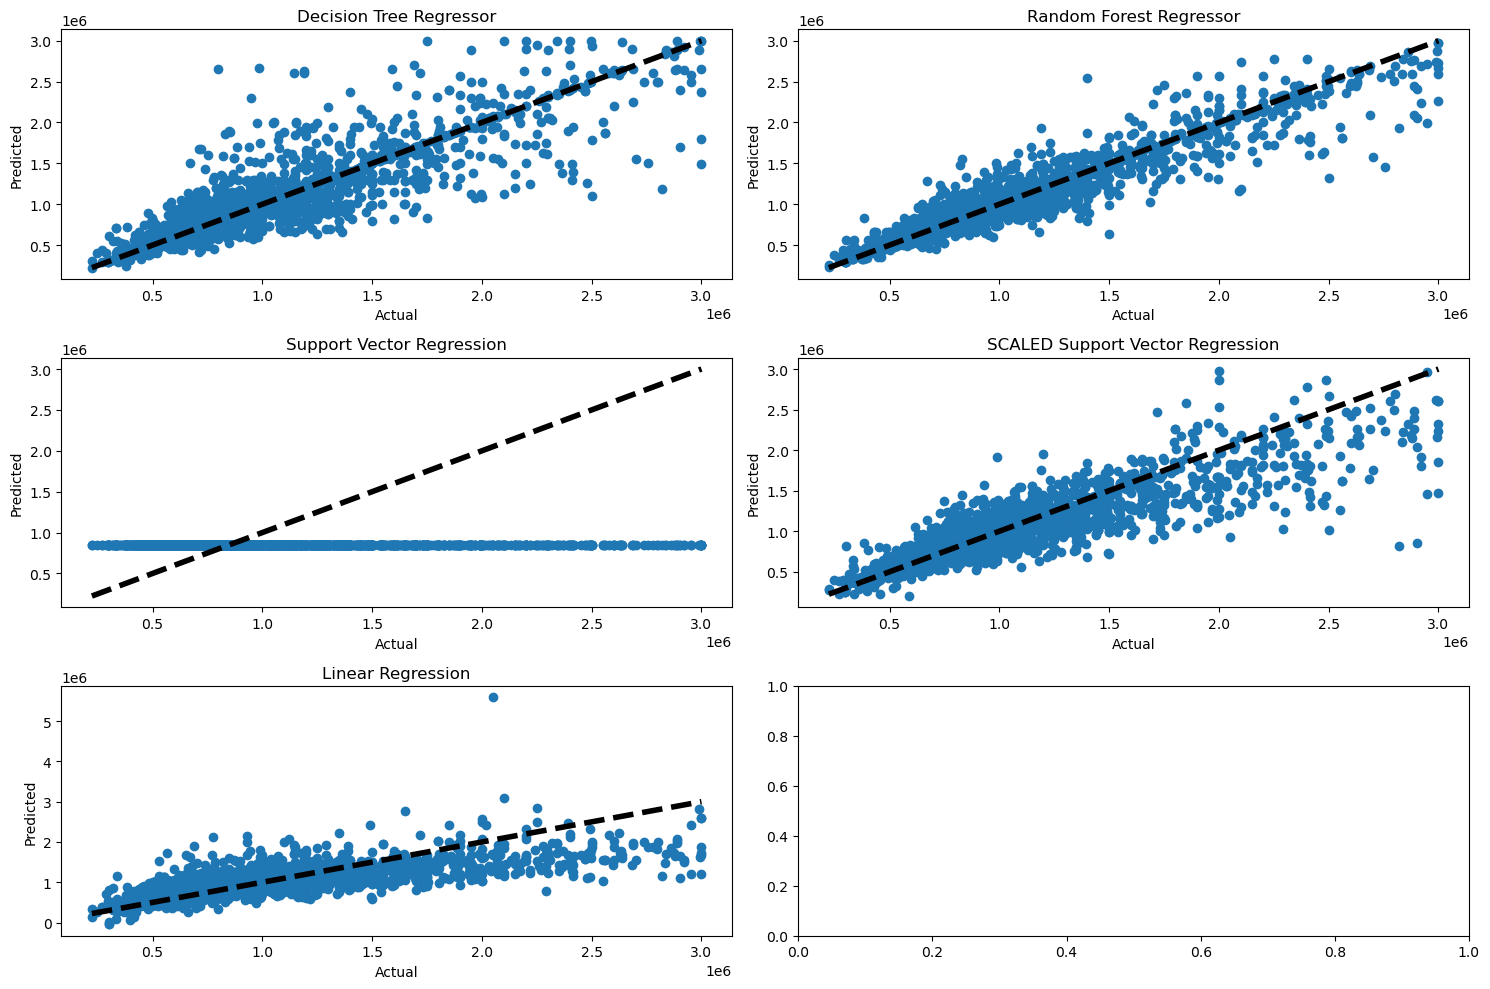

In [27]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Actual vs Predicted for DecisionTreeRegressor
axs[0, 0].scatter(y_test, tree_predict)
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[0, 0].set_xlabel('Actual')
axs[0, 0].set_ylabel('Predicted')
axs[0, 0].set_title('Decision Tree Regressor')

# Actual vs Predicted for RandomForestRegressor
axs[0, 1].scatter(y_test, forest_predict)
axs[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[0, 1].set_xlabel('Actual')
axs[0, 1].set_ylabel('Predicted')
axs[0, 1].set_title('Random Forest Regressor')

# Actual vs Predicted for SVR
axs[1, 0].scatter(y_test, svr_predict)
axs[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[1, 0].set_xlabel('Actual')
axs[1, 0].set_ylabel('Predicted')
axs[1, 0].set_title('Support Vector Regression')

# # Add the plot for the scaled SVR
axs[1, 1].scatter(y_test, svr_scaled_predict)
axs[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[1, 1].set_xlabel('Actual')
axs[1, 1].set_ylabel('Predicted')
axs[1, 1].set_title('SCALED Support Vector Regression')

# Actual vs Predicted for LinearRegression
axs[2, 0].scatter(y_test, lr_predict)
axs[2, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[2, 0].set_xlabel('Actual')
axs[2, 0].set_ylabel('Predicted')
axs[2, 0].set_title('Linear Regression')

# Display the figure
plt.tight_layout()
plt.show()

<!-- ![Optional Text](photos\21_Bias_n_Variance.png) -->
<img src="photos/21_Bias_n_Variance.png" width="250" height="255">

### Important REMARKS:
- Decision Tree has low bias & high variance- as can be notices in the scratter plot.
- Applying Ensembling technique on it, such as Random Forest here, reduces the variance.
- SVR without scaling the data is absolute waste of time.
- SVR (SCALED) is known to be for low bias and high variace, but we can't justify this in our chart.
- Linear Regression has high bias and low variance, as noticiable.

### Statistical Measures:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R-Squared (R2)

In [28]:
import pandas as pd

# Create a dictionary with the metrics
ml_stats_data = {
    'Model': ['Decision Tree','Random Forest', 'Support Vector Regression', 'SCALED Support Vector Regression', 'Linear Regression'],
    'Score': [tree_score, forest_score, svr_score, svr_scaled_score, lr_score],
    'MAE': [tree_mae, forest_mae, svr_mae, svr_scaled_mae, lr_mae],
    'MSE': [tree_mse, forest_mse, svr_mse,svr_scaled_mse, lr_mse],
    'R2': [tree_r2, forest_r2, svr_r2, svr_scaled_r2, lr_r2]
}

# Create a DataFrame from the dictionary
ml_stats_df = pd.DataFrame(ml_stats_data)

# Display the DataFrame
ml_stats_df

,Model,Score,MAE,MSE,R2
0,Decision Tree,0.774414,118902.929174,5.245709e+10,0.774414
1,Random Forest,0.893948,92080.335644,2.466111e+10,0.893948
2,Support Vector Regression,-0.079356,330464.207064,2.509904e+11,-0.079356
3,SCALED Support Vector Regression,0.795728,143929.232475,5.270301e+10,0.773357
4,Linear Regression,0.544369,223701.225869,1.059512e+11,0.544369


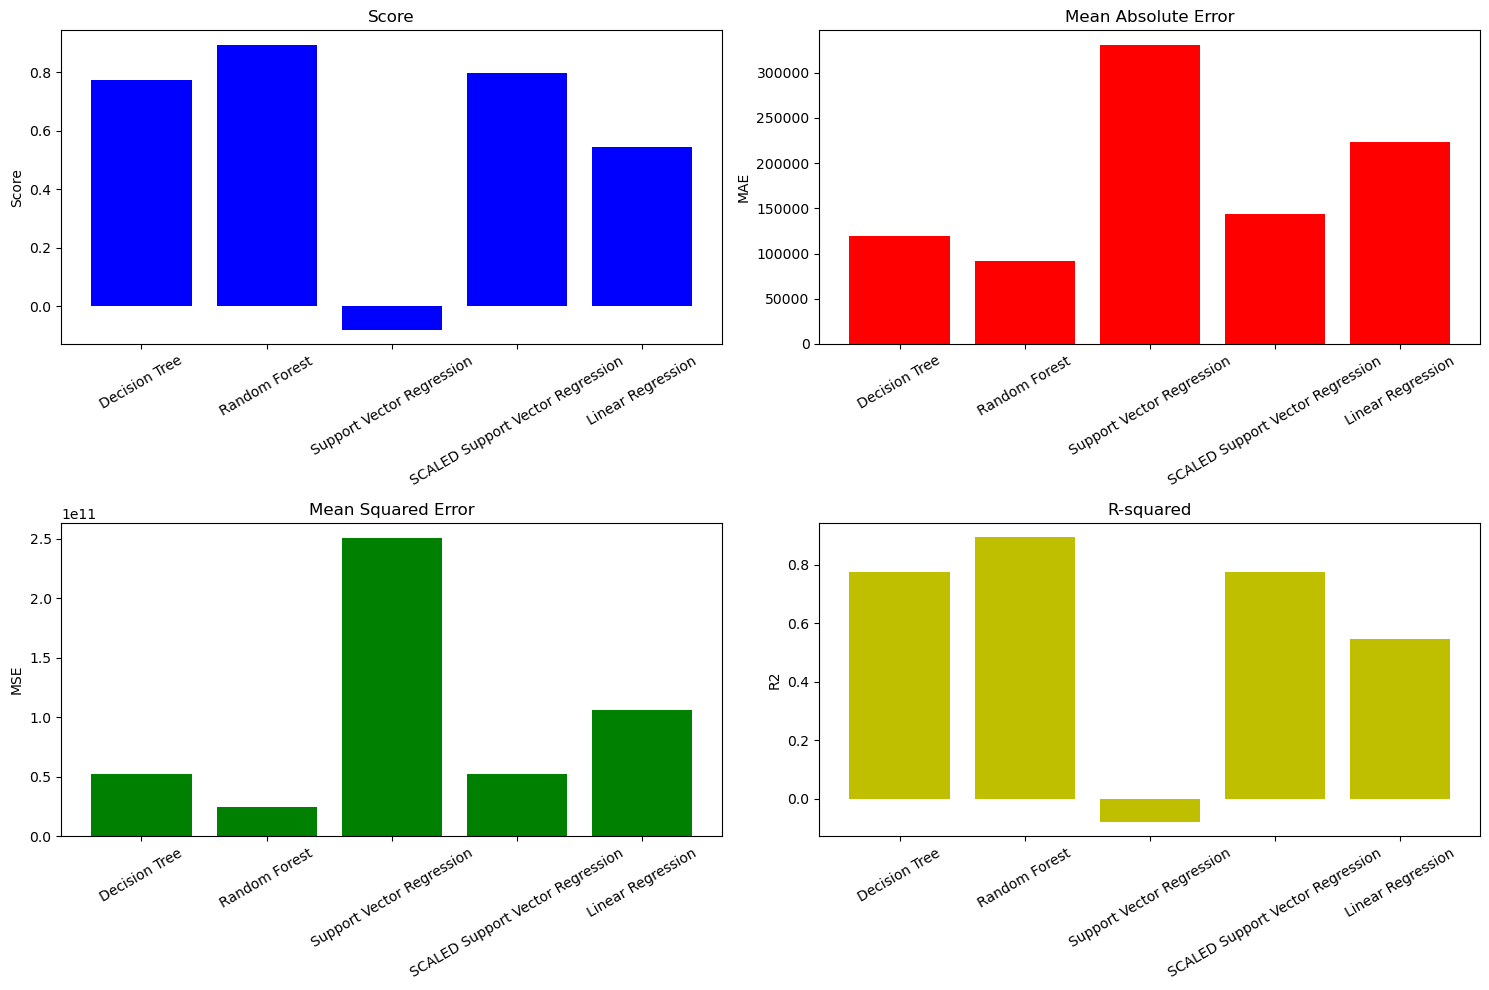

In [29]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Bar plot for Score
axs[0, 0].bar(ml_stats_df['Model'], ml_stats_df['Score'], color='b')
axs[0, 0].set_title('Score')
axs[0, 0].set_ylabel('Score')

# Bar plot for MAE
axs[0, 1].bar(ml_stats_df['Model'], ml_stats_df['MAE'], color='r')
axs[0, 1].set_title('Mean Absolute Error')
axs[0, 1].set_ylabel('MAE')

# Bar plot for MSE
axs[1, 0].bar(ml_stats_df['Model'], ml_stats_df['MSE'], color='g')
axs[1, 0].set_title('Mean Squared Error')
axs[1, 0].set_ylabel('MSE')

# Bar plot for R2
axs[1, 1].bar(ml_stats_df['Model'], ml_stats_df['R2'], color='y')
axs[1, 1].set_title('R-squared')
axs[1, 1].set_ylabel('R2')

# Set xticklabels rotation for all subplots
for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        
# Display the figure
plt.tight_layout()
plt.show()

## Pickel It

In [ ]:
import sys

sys.exit()

In [33]:
import pickle

# Assume that `model1`, `model2`, `model3`, etc. are your trained models
tree = ...
forest = ...
svr_unscaled = ...
svr_scaled = ...
lr = ...

# Put the models in a dictionary
models = {
    "tree": tree,
    "forest": forest,
    "svr": svr,
    "svr_scaled": svr_scaled,
    "lr": lr,
}

# Loop through the models and save each one separately
for model_name, model in models.items():
    filename = f"export_{model_name}.pkl"  # Create a filename for each model (e.g., model1.pkl, model2.pkl)
    with open(filename, "wb") as file:
        pickle.dump(model, file)

In [ ]:
import sys

sys.exit()

In [30]:
import pickle

# Assume that `model1`, `model2`, `model3`, etc. are your trained models
model1 = ...
model2 = ...
model3 = ...
model4 = ...
model5 = ...

# Put the models in a dictionary
models = {'model1': tree, 'model2': forest, 'model3': svr, 'model4': svr_scaled, 'model5': lr}

# Save the dictionary of models to a file
with open('models.pkl', 'wb') as file:
    pickle.dump(models, file)

In [31]:
import sys

sys.exit("Safe Manual Exit!")

# Load the dictionary of models from a file
with open('models.pkl', 'rb') as file:
    loaded_models = pickle.load(file)

# Access the models from the dictionary
model1 = loaded_models['model1']
model2 = loaded_models['model2']
model3 = loaded_models['model3']
model4 = loaded_models['model4']
model5 = loaded_models['model5']

SystemExit: Safe Manual Exit!

c:\Users\Purn\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
